# Questão 1: Perceptron de Camada Única 

## Problema

A representação de uma determinada mensagem digital ternária, isto é formada por três bits, forma um cubo cujos vértices correspondem a mesma representação digital. Supondo que ao transmitirmos esta mensagem a mesma possa ser contaminada por ruído formado em torno de cada vértice uma nuvem esférica de valores aleatórios com raio máximo é 0.1.

## Ideia

Implementar o Perceptron de Rosenblatt (Perceptron de camada única) para atuar como classificador/decodificador.

## Características do dados

//TODO

## Geração atomática de dados

//TODO

In [1]:
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Funções de Ativação

Foram implementadas funções básicas de ativação para serem opções no uso na rede.

In [2]:
def linear(x):
    return np.ones_like(x) if derivative else x

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def step(x):
    return np.where(x>0,1,-1)

## Classe Layer

A classe Layer representa uma layer da rede guardando a entrada da camada, pesos, biases, função de ativação e saída da camada.

### Parâmetros

- __input_dim__: dimensão dos dados de entrada da camada
- ___units___: quantidade de neurônios da camada
- __activation__: função de ativação que será utilizada nos neurônios da rede

### Atributos

- __input__: dados de entrada da camada
- __weights__: matriz todos os pesos de todos os neutônios da camada
- __biases__: vetor com os valores dos bias de todos os neurônios da camada
- __activation__: função de ativação que será utilizada nos neurônios da rede
- __activ_out__: guarda os valores resultantes da função de ativação



In [3]:
class Layer():
    def __init__(self, input_dim, units=1, activation=step):
        self.input = None
        self.weights = np.random.randn(units, input_dim)
        self.biases = np.random.randn(1, units)
        self.activation = activation
        self._activ_out = None



## Classe NeuralNetwork

A classe representa a Rede Neural, na caso o Perceptron.

### Atributos

- __layers__: conjunto de layers da rede


In [57]:
class NeuralNetwork():
    def __init__(self):
        self.layers = []
        
    def fit(self, x, y, x_valid, y_valid, learning_rate=1e-3, epochs=100, verbose=10, plot=False):
        '''
            Função de treinamento
            Parâmetros:
                x - entradas
                y - saídas esperadas
                learning_rate - taxa de aprendizagem
                epochs - quantidade de épocas de treinamento
                verbose - passos para verificação da época
        '''
        errors_train = []
        errors_valid = []

        for epoch in range(epochs+1):
            error_epoch = []
            for x_i, y_i in zip(x, y):
                x_i =  x_i.reshape(1, x.shape[1])
                y_pred = self.__feedforward(x_i)

                erro = y_i - y_pred
                error_epoch.append(st.median(erro[0]))
                
                for layer in self.layers:
                    layer.weights += learning_rate * np.dot(erro.T, x_i)
                    layer.biases += learning_rate * erro[0]
            
            y_pred = self.prediction(x_valid)
            acc = self.evaluate(y_pred, y_valid)
            errors_valid.append(1 - acc)
            
            errors_train.append(st.median(error_epoch))
            
            if epoch % verbose == 0:
                print("epoch: {0:=4}/{1}\n error: {2}".format(epoch, epochs, st.median(erro[0])))
            
        return errors_train, errors_valid
    
    def add_layer(self, layer):
        '''
            Método para adição de layers ao modelo
            Parâmetros:
                layer - Layer a se adicionada ao modelo
        '''
        self.layers.append(layer)
    
    def __feedforward(self, x):
        '''
            Método de Feedforward - Efetua a multiplicação das entradas pelos pesos, soma ao bias, aplica função de ativação
            Parâmetros:
                x - dados de entrada
        '''
        self.layers[0].input = x
        for current_layer, next_layer in zip(self.layers, self.layers[1:]+[Layer(0,0)]):
            y = np.dot(current_layer.input, current_layer.weights.T) + current_layer.biases
            current_layer._activ_out = next_layer.input = current_layer.activation(y)
        return self.layers[-1]._activ_out
    
    def prediction(self, x):
        '''
            Método de Predição - Gera um conjunto de valores resultante do processo de FeedForward nos para os dados de entrada
            Parâmetros:
                x - dados de entrada
        '''
        y_pred = []
        
        for data in x:
            y_pred.append(self.__feedforward(data))
            
        return np.array(y_pred)
    
    def evaluate(self,y_pred, y, dtype=int):
        '''
            Método Evaluate - Verifica a accuracy da rede
            Parâmetros:
                y_pred - resultado do processo de FeedForward sobre os dados de entrada
                dtype - tipo dos dados
        '''
        score = 0
        #total = 100.0/y.shape[0]
        total = 1/y.shape[0]

        # verifica se possuem o tipo de saída esperado
        y_pred = y_pred.astype(dtype)
        y = y.astype(dtype)

        for y_i, y_pred_i in zip(y,y_pred):
            if np.array_equal(y_i,y_pred_i[0]):
                score+=1

        return score*total

## Execução

__1__ - A rede é inicializada

__2__ - Os dados de entrada e saida são obtidos

__3__ - Treinamento é feito com 80% dos dados e o Teste com os 20% restantes

__4__ - Accuracy da rede é verificada

## Arquitetura Usada

//TODO

## Parâmetros utilizados

//TODO

epoch:    0/40
 error: -2.0


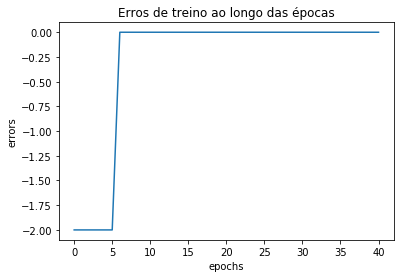

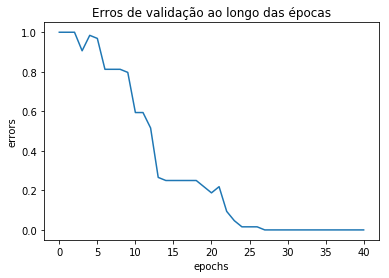

100.0 %


In [56]:
nn = NeuralNetwork()

x = []
y = []

# leitura dos dados
for line in open('./data_x.txt', 'r').readlines():
    x.append([float(num) for num in line.split(',')])

for line in open('./data_y.txt', 'r').readlines():
    y.append([int(num) for num in line.split(',')])

# dados de treino
x = np.array(x[:int(len(x) * 0.8)])
y = np.array(y[:int(len(y) * 0.8)])

# dados de validação
x_valid = np.array(x[int(len(x) * 0.8):])
y_valid = np.array(y[int(len(y) * 0.8):])

nn.add_layer(Layer(input_dim=x.shape[1], units=y.shape[1], activation=step))

# treinamento
errors_train, errors_valid = nn.fit(x, y, x_valid, y_valid, learning_rate=0.001 , epochs=40, verbose=100, plot=True)

plt.title("Erros de treino ao longo das épocas")
plt.xlabel("epochs")
plt.ylabel("errors")
plt.plot(errors_train)
plt.show()

plt.title("Erros de validação ao longo das épocas")
plt.xlabel("epochs")
plt.ylabel("errors")
plt.plot(errors_valid)
plt.show()

y_pred = nn.prediction(x_valid)

print(nn.evaluate(y_pred, y_valid) * 100, "%")
